## Corpus data process using NLTK or word cloud
   ### 1. plot_keywords
   ### 2. genres

In [4]:
# install this lib for wordcloud
!pip install WordCloud

    100% |████████████████████████████████| 368kB 444kB/s ta 0:00:011


In [1]:
import nltk
import re
import os
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/pari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

In [2]:
dataset = pd.read_csv("raw/movie_metadata.csv")

### Function for Cleaning and processing corpus data

In [3]:
def removePunctuations(text):
    """
    Remove all punctuation from string
    """
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    row = ""
    for char in text:
        if char not in punctuations:
            row = row + char
    return row

def cleanCorpus(text):
    """
    Clean all corpus data
    """
    text ="".join(x for x in text if 31 < ord(x) <127)
    text=text.replace('\\n',' ')
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub(r'\s+',' ',text)
    return text

def corpusPeprocessing(text,lemmatize=False,maxlength=0):
    """
    Text Preprocessing in this function remove stop words and punctuation as well
    """
    text = removePunctuations(text)
    text = text.replace("|"," ") 
    text = cleanCorpus(text)
    words = text.split()
#     words = word_tokenize(text)
    stopw = stopwords.words('english')
    tokens = [token for token in words if token.lower() not in stopw]
    tokens = [w for w in tokens if w.lower() not in string.punctuation]
    
#     # remove words less than three letters
#     # lemmatize
    if lemmatize == True:
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens]
        
    tokens = [word for word in tokens if len(word) >= maxlength +1]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text.replace("'","") 

In [18]:
txtkeyword = "".join(str(dataset["plot_keywords"]))
txtgenres = "".join(str(dataset["genres"]))


### corpusPeprocessing(text="corpus data",lemmatize=True/False(working worked-> work),maxlength=5(take word more then 5 char))

In [20]:
text=corpusPeprocessing(txtkeyword,lemmatize=False,maxlength=5)
wordcloud = WordCloud().generate(text)

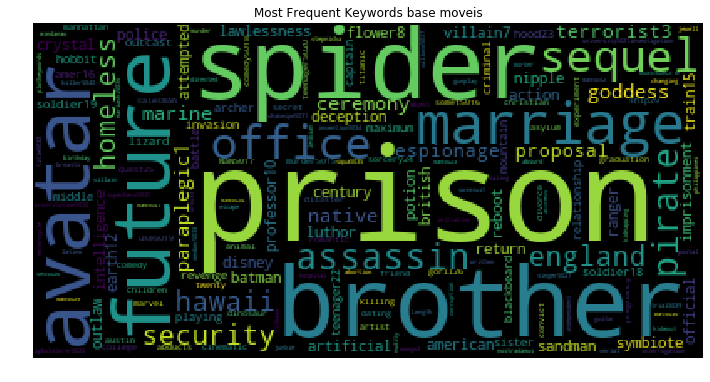

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=0))
plt.title('Most Frequent Keywords base moveis')
plt.axis("off")
plt.show()

In [22]:
text=corpusPeprocessing(txtgenres,lemmatize=False,maxlength=5)
wordcloud = WordCloud().generate(text)

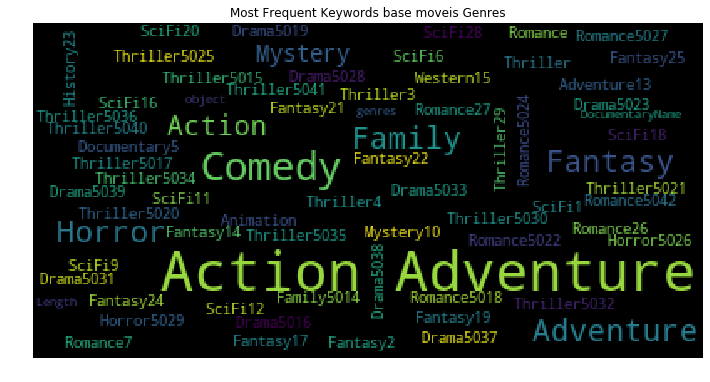

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=0))
plt.title('Most Frequent Keywords base moveis Genres')
plt.axis("off")
plt.show()